<a href="https://colab.research.google.com/github/Hmzkhnswt/Face-Mask-Detection-using-VGG16/blob/main/maskdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d sumansid/facemask-dataset

 85% 97.0M/114M [00:02<00:00, 57.3MB/s]
100% 114M/114M [00:02<00:00, 56.3MB/s] 


In [3]:
import zipfile
zip = zipfile.ZipFile("/content/facemask-dataset.zip",'r')
zip.extractall("/content")
zip.close()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
mask_folder_path = "/content/Mask/Mask"
nomask_folder_path = "/content/No Mask/No Mask"

masks = []
nomasks = []
labels = []
paths = []

# Loop through images in the "Mask" folder
for filename in os.listdir(mask_folder_path):
    if filename.startswith("M") or filename.startswith("m"):
        masks.append(filename)
        labels.append(masks[0][0])
        paths.append(filename)
# Loop through images in the "No Mask" folder
for filename in os.listdir(nomask_folder_path):
    if filename.startswith("N") or filename.startswith("n"):
        nomasks.append(filename)
        labels.append(nomasks[0][0])
        paths.append(filename)


In [6]:
print(len(paths))
print(len(labels))
print(len(masks+nomasks))

339
339
339


In [7]:
print("Files starting with 'M':", masks)
print("Files starting with 'N':", nomasks)

Files starting with 'M': ['Mask133.jpg', 'Mask208.jpeg', 'Mask87.jpeg', 'Mask225.jpeg', 'Mask77.jpg', 'Mask256.jpg', 'Mask19.jpg', 'Mask126.jpg', 'Mask284.jpg', 'Mask245.jpg', 'Mask287.jpg', 'Mask180.jpg', 'Mask223.jpeg', 'Mask194.jpg', 'Mask240.jpg', 'Mask123.jpeg', 'Mask204.jpg', 'Mask181.jpg', 'Mask90.jpeg', 'Mask65.jpg', 'Mask177.png', 'Mask228.jpg', 'Mask221.jpeg', 'Mask271.jpg', 'Mask44.jpg', 'Mask76.jpg', 'Mask272.jpg', 'Mask149.jpg', 'Mask247.jpg', 'Mask27.jpg', 'Mask134.jpg', 'Mask80.jpg', 'Mask267.jpg', 'Mask178.jpg', 'Mask74.jpg', 'Mask270.jpg', 'Mask51.jpg', 'Mask168.jpg', 'Mask121.jpeg', 'Mask83.jpeg', 'Mask216.jpeg', 'Mask62.jpg', 'Mask164.jpg', 'Mask137.jpg', 'Mask239.jpg', 'Mask167.jpg', 'Mask187.jpg', 'Mask253.jpg', 'Mask237.jpg', 'Mask175.jpg', 'Mask201.jpg', 'Mask131.jpg', 'Mask290.jpg', 'Mask250.jpg', 'Mask211.jpeg', 'Mask255.jpg', 'Mask212.jpeg', 'Mask141.jpg', 'Mask64.jpg', 'Mask122.jpeg', 'Mask49.jpg', 'Mask203.jpg', 'Mask264.jpg', 'Mask136.jpg', 'Mask189.jpg', '

In [8]:
df = pd.DataFrame({"Images": masks + nomasks, "Path": paths, "Labels" : labels})
df.head()

,Images,Path,Labels
0,Mask133.jpg,Mask133.jpg,M
1,Mask208.jpeg,Mask208.jpeg,M
2,Mask87.jpeg,Mask87.jpeg,M
3,Mask225.jpeg,Mask225.jpeg,M
4,Mask77.jpg,Mask77.jpg,M


In [9]:
df["Labels"].value_counts()

M    208
N    131
Name: Labels, dtype: int64

<Axes: xlabel='Labels', ylabel='count'>

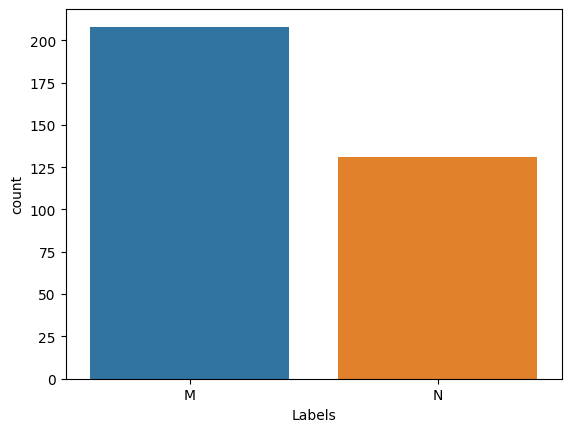

In [10]:
import seaborn as sns
sns.countplot(df, x = df['Labels'])

In [29]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with desired augmentations
dataGen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=.02,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
)

img = image.load_img(r"/content/No Mask/No Mask/No Mask50.jpg",target_size=(512,512))

img1= image.img_to_array(img)

input_batch1 = img1.reshape(1,512,512,3)

i = 0
for out_img in dataGen.flow(input_batch1,batch_size=1,save_to_dir="/content/No Mask/No Mask"):
    i = i+1
    if i == 5:
        break


In [30]:
mask_folder_path = "/content/Mask/Mask"
nomask_folder_path = "/content/No Mask/No Mask"

masks = []
nomasks = []
labels = []
paths = []

# Loop through images in the "Mask" folder
for filename in os.listdir(mask_folder_path):
    if filename.startswith("M") or filename.startswith("m") or filename.startswith("_"):
        masks.append(filename)
        labels.append(masks[0][0])
        paths.append(filename)
# Loop through images in the "No Mask" folder
for filename in os.listdir(nomask_folder_path):
    if filename.startswith("N") or filename.startswith("n") or filename.startswith("_"):
        nomasks.append(filename)
        labels.append(nomasks[0][0])
        paths.append(filename)


In [31]:
print(len(paths))
print(len(labels))
print(len(masks+nomasks))

416
416
416


In [32]:
df = pd.DataFrame({"Images": masks + nomasks, "Path": paths, "Labels" : labels})
df.head()

,Images,Path,Labels
0,Mask133.jpg,Mask133.jpg,M
1,Mask208.jpeg,Mask208.jpeg,M
2,Mask87.jpeg,Mask87.jpeg,M
3,Mask225.jpeg,Mask225.jpeg,M
4,Mask77.jpg,Mask77.jpg,M


In [33]:
df["Labels"].value_counts()

M    208
N    208
Name: Labels, dtype: int64

### After Data Augmentation

<Axes: xlabel='Labels', ylabel='count'>

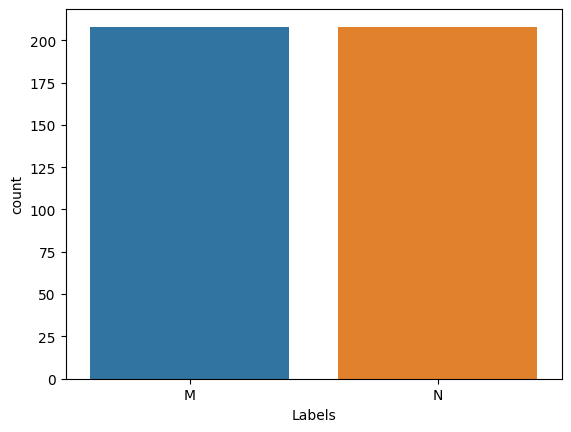

In [34]:
import seaborn as sns
sns.countplot(df, x = df['Labels'])

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Labels"] = encoder.fit_transform(df["Labels"])

Error during extraction: [Errno 22] Invalid argument


### Data Preprocessing: Scaling and Normalization


In [82]:
import cv2
import os
import numpy as np

# Define the folder path containing your images
folder_path = "/content/Mask/Mask"

# Initialize empty lists to store images and corresponding labels
images = []
labels = []

# Loop through files in the folder
for filename in os.listdir(folder_path):
    # Get the full file path
    file_path = os.path.join(folder_path, filename)

    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"File does not exist: {file_path}")
        continue

    # Load and preprocess the image (resize, normalize, etc.)
    img = cv2.imread(file_path)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Error loading image: {file_path}")
        continue

    img = cv2.resize(img, (512, 512))  # Resize to 512x512 pixels (or your desired size)
    img = img / 255.0  # Normalize pixel values to the range [0, 1]

    # Check if the filename contains "mask" (case insensitive)
    if "mask" in filename.lower():
        label = 0  # Assign label 0 for images containing "mask"
    else:
        label = 1  # Assign label 1 for other images

    # Append the image and label to the respective lists
    images.append(img)
    labels.append(label)

# Convert image and label lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Print the shape of the images and labels arrays
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Error loading image: /content/Mask/Mask/Mask159.gif
Images shape: (207, 512, 512, 3)
Labels shape: (207,)


In [77]:
labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [74]:
import cv2
import os
import numpy as np

# Define the folder path containing your images
folder_path = "/content/No Mask/No Mask"

# Initialize empty lists to store images and corresponding labels
images = []
labels = []

# Loop through files in the folder
for filename in os.listdir(folder_path):
    # Get the full file path
    file_path = os.path.join(folder_path, filename)

    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"File does not exist: {file_path}")
        continue

    # Load and preprocess the image (resize, normalize, etc.)
    img = cv2.imread(file_path)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Error loading image: {file_path}")
        continue

    img = cv2.resize(img, (512, 512))  # Resize to 512x512 pixels (or your desired size)
    img = img / 255.0  # Normalize pixel values to the range [0, 1]

    # Check if the filename contains "mask" (case insensitive)
    if "no" or "_" in filename.lower():
        label = 1  # Assign label 0 for images containing "mask"
    else:
        label = 0  # Assign label 1 for other images

    # Append the image and label to the respective lists
    images.append(img)
    labels.append(label)

# Convert image and label lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Print the shape of the images and labels arrays
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Error loading image: /content/No Mask/No Mask/No Mask3.gif
Images shape: (207, 512, 512, 3)
Labels shape: (207,)


In [75]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [92]:
import cv2
import os
import numpy as np

# Initialize empty lists to store images and corresponding labels
images = []
labels = []

# Define the folder paths containing your images
folder_paths = ["/content/Mask/Mask", "/content/No Mask/No Mask"]

# Loop through each folder
for folder_path in folder_paths:
    # Determine the label based on the folder
    if folder_path.startswith("/content/No Mask/No Mask"):
        label = 0  # Assign label 0 for images containing "mask"
    else:
        label = 1  # Assign label 1 for other images

    # Loop through files in the folder
    for filename in os.listdir(folder_path):
        # Get the full file path
        file_path = os.path.join(folder_path, filename)

        # Check if the file exists
        if not os.path.exists(file_path):
            print(f"File does not exist: {file_path}")
            continue

        # Load and preprocess the image (resize, normalize, etc.)
        img = cv2.imread(file_path)

        # Check if the image was loaded successfully
        if img is None:
            print(f"Error loading image: {file_path}")
            continue

        img = cv2.resize(img, (512, 512))  # Resize to 512x512 pixels (or your desired size)
        img = img / 255.0  # Normalize pixel values to the range [0, 1]

        # Append the image and label to the respective lists
        images.append(img)
        labels.append(label)

# Convert image and label lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Print the shape of the combined images and labels arrays
print("Combined Images shape:", images.shape)
print("Combined Labels shape:", labels.shape)


Error loading image: /content/Mask/Mask/Mask159.gif
Error loading image: /content/No Mask/No Mask/No Mask3.gif
Combined Images shape: (414, 512, 512, 3)
Combined Labels shape: (414,)


In [93]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [94]:
from keras.applications.vgg16 import VGG16
from keras.layers import *
from keras.models import Model

In [95]:
vggnet = VGG16(include_top=False, input_shape=(512,512,3))

In [97]:
vggnet.trainable = False
output = vggnet.layers[-1].output

In [98]:
flatten = Flatten()(output)
dense1 = Dense(512, activation='relu')(flatten)
dense2 = Dense(512, activation='relu')(flatten)
output_final = Dense(1, activation='sigmoid')(dense2)

In [99]:
model = Model(inputs = vggnet.inputs, outputs = output_final)

In [100]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0   

In [102]:
model.compile(
    optimizer="adam",
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [127]:
from tqdm import tqdm
for epoch in tqdm(range(1), desc="Training"):
    history = model.fit(
        images,  # Your training images
        labels,  # Your training labels
        epochs=10,  # Train for 1 epoch at a time
        batch_size=32,  # Adjust the batch size as needed
        validation_split=0.2  # Use a validation split if you have a separate validation dataset
    )


Training:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/10
11/11 [==============================] - 9s 773ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.2515 - val_accuracy: 0.8795
Epoch 2/10
11/11 [==============================] - 9s 866ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2709 - val_accuracy: 0.8795
Epoch 3/10
11/11 [==============================] - 9s 803ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2272 - val_accuracy: 0.9036
Epoch 4/10
11/11 [==============================] - 9s 824ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.2140 - val_accuracy: 0.9157
Epoch 5/10
11/11 [==============================] - 10s 889ms/step - loss: 8.4059e-04 - accuracy: 1.0000 - val_loss: 0.2721 - val_accuracy: 0.8675
Epoch 6/10
11/11 [==============================] - 9s 803ms/step - loss: 7.8520e-04 - accuracy: 1.0000 - val_loss: 0.1886 - val_accuracy: 0.9398
Epoch 7/10
11/11 [==============================] - 9s 871ms/step - loss: 6.6121e-04 - accuracy: 1.0000 - val_loss: 0.2859 - val_accuracy: 

Training: 100%|██████████| 1/1 [02:24<00:00, 144.30s/it]


In [128]:
import matplotlib.pyplot as plt

new_image_path = "/content/No Mask/No Mask/No Mask1.jpeg"
img = image.load_img(new_image_path, target_size=(512, 512))
babar_mask = image.img_to_array(img)
input_babar = babar_mask.reshape(1, 512, 512, 3)

predictions = model.predict(input_babar)
print(predictions)


1/1 [==============================] - 0s 20ms/step
[[0.00044614]]


In [129]:
import matplotlib.pyplot as plt

new_image_path = "/content/Mask/Mask/Mask116.jpeg"
img = image.load_img(new_image_path, target_size=(512, 512))
babar_mask = image.img_to_array(img)
input_babar = babar_mask.reshape(1, 512, 512, 3)

predictions = model.predict(input_babar)

print(predictions)


1/1 [==============================] - 0s 23ms/step
[[1.]]


1/1 [==============================] - 0s 20ms/step
[[1.]]
Result: Mask


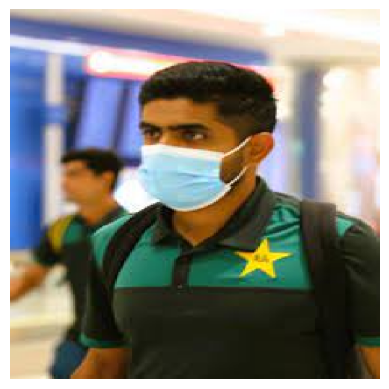

In [130]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing import image

new_image_path = "/content/babarmask.jpg"
img = image.load_img(new_image_path, target_size=(512, 512))
babar_mask = image.img_to_array(img)
input_babar = babar_mask.reshape(1, 512, 512, 3)

predictions = model.predict(input_babar)
print(predictions)

# Define a threshold
threshold = 0.5

if predictions[0][0] < threshold:
    result = "No Mask"
else:
    result = "Mask"

print("Result:", result)

# Display the image
plt.imshow(img)
plt.axis('off')  # Remove axis labels and ticks
plt.show()


1/1 [==============================] - 0s 22ms/step
[[0.]]
Result: No Mask


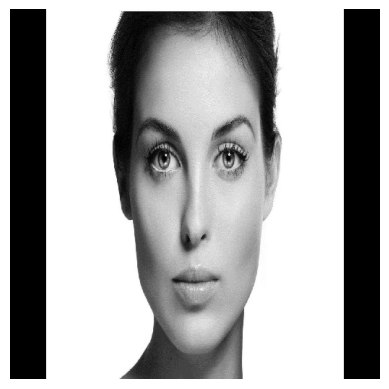

In [131]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing import image

new_image_path = "/content/No Mask/No Mask/No Mask53.jpg"
img = image.load_img(new_image_path, target_size=(512, 512))
babar_mask = image.img_to_array(img)
input_babar = babar_mask.reshape(1, 512, 512, 3)

predictions = model.predict(input_babar)
print(predictions)

# Define a threshold
threshold = 0.5

if predictions[0][0] < threshold:
    result = "No Mask"
else:
    result = "Mask"

print("Result:", result)

# Display the image
plt.imshow(img)
plt.axis('off')  # Remove axis labels and ticks
plt.show()


1/1 [==============================] - 0s 20ms/step
[[1.]]
Result: Mask


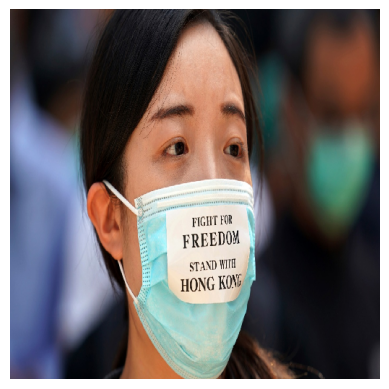

In [132]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing import image

new_image_path = "/content/Mask/Mask/Mask148.jpg"
img = image.load_img(new_image_path, target_size=(512, 512))
babar_mask = image.img_to_array(img)
input_babar = babar_mask.reshape(1, 512, 512, 3)

predictions = model.predict(input_babar)
print(predictions)

# Define a threshold
threshold = 0.5

if predictions[0][0] < threshold:
    result = "No Mask"
else:
    result = "Mask"

print("Result:", result)

# Display the image
plt.imshow(img)
plt.axis('off')  # Remove axis labels and ticks
plt.show()
